In [62]:
### PREAMBLE
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from helper_functions import *

sns.set_style("whitegrid")

In [63]:
### PARAMETERS
threshold = 5
show = 'Doctor Who'
remove_stop_words = True

In [64]:
### DATA PROCESSING
episode_data = load_data(show)


features = get_all_features(episode_data['plot'], threshold = threshold, remove_stop_words = remove_stop_words)
tokenizer = RegexpTokenizer(r'\w+')

# make a long format data frame, one row per word instance
all_ratings, all_tokens = [], []

for _, row in episode_data.iterrows():
    rating = row['rating']
    
    plot_tokens = tokenizer.tokenize( row['plot'].lower() )
    plot_tokens = [token for token in plot_tokens if token in features.keys()]
    
    all_ratings = all_ratings + [rating]*len(plot_tokens)
    all_tokens = all_tokens + plot_tokens
    
word_data = pd.DataFrame({'word': all_tokens, 'rating': all_ratings})

In [65]:
# pick 
word_mean_rating = word_data.groupby('word')['rating'].median()
word_mean_rating = word_mean_rating.sort_values()

worst_words = list(word_mean_rating.index[0:10])
best_words = list(word_mean_rating.index[(len(word_mean_rating) - 10):len(word_mean_rating)])

In [66]:
best_words

[u'able',
 u'donna',
 u'dalek',
 u'jack',
 u'little',
 u'mystery',
 u'song',
 u'river',
 u'universe',
 u'become']

In [67]:
best_data = word_data[word_data['word'].isin(best_words)]
worst_data = word_data[word_data['word'].isin(worst_words)]

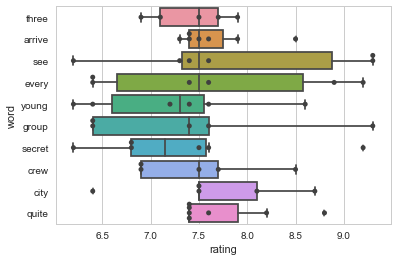

In [68]:
sns.boxplot(x='rating', y='word', data=worst_data)
sns.swarmplot(x='rating', y='word', data=worst_data, color='.25')

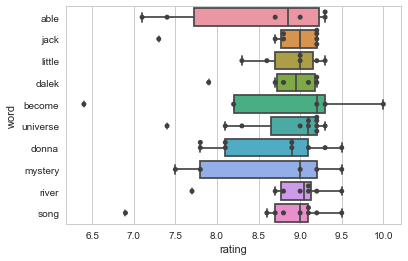

In [69]:
sns.boxplot(x='rating', y='word',  data=best_data)
sns.swarmplot(x='rating', y='word', data=best_data, color='.25')

In [71]:
best_words

[u'able',
 u'donna',
 u'dalek',
 u'jack',
 u'little',
 u'mystery',
 u'song',
 u'river',
 u'universe',
 u'become']